# imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from basin_volume import *

/home/adam/.conda/envs/jax311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
import pickle

# Experiments

In [5]:
results_dir = os.path.join(BASIN_VOLUME_DIR, "results_0205")
sorted(os.listdir(results_dir))

['convnext_chkpts_adam_cleansplit.pkl',
 'convnext_chkpts_adam_poison_cleansplit.pkl',
 'convnext_chkpts_cleansplit.pkl',
 'convnext_chkpts_poison_cleansplit.pkl',
 'convnext_cutoff_1e-05_cleansplit.pkl',
 'convnext_cutoff_1e-05_poison_cleansplit.pkl',
 'convnext_cutoff_adam_1e-05_cleansplit.pkl',
 'convnext_cutoff_adam_1e-05_poison_cleansplit.pkl',
 'convnext_exponent_1e-05_cleansplit.pkl',
 'convnext_exponent_1e-05_poison_cleansplit.pkl',
 'convnext_exponent_adam_1e-05_cleansplit.pkl',
 'convnext_exponent_adam_1e-05_poison_cleansplit.pkl',
 'convnext_histo_adam_cleansplit.pkl',
 'convnext_histo_adam_poison_cleansplit.pkl',
 'convnext_histo_cleansplit.pkl',
 'convnext_histo_poison_cleansplit.pkl']

In [12]:
plots_dir = os.path.join(plots_dir, "cifar_train")
os.makedirs(plots_dir, exist_ok=True)

In [5]:
with open(os.path.join(results_dir, "convnext_chkpts_True.pkl"), "rb") as f:
    _, cfg = pickle.load(f)
    print(cfg.preconditioner_type, cfg.model_name)

with open(os.path.join(results_dir, "convnext_histo_True.pkl"), "rb") as f:
    _, cfg = pickle.load(f)
    print(cfg.preconditioner_type, cfg.model_name)


None b16pai_p4
None b16pai_p4


## histo

In [7]:
[name for name in sorted(os.listdir(results_dir)) if "histo" in name]

['convnext_histo_adam_cleansplit.pkl',
 'convnext_histo_adam_poison_cleansplit.pkl',
 'convnext_histo_cleansplit.pkl',
 'convnext_histo_poison_cleansplit.pkl']

In [8]:
pwr = 6
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)

None 1000 -12371668.0 455972.22
None 1000 -15180383.0 459189.06
adam 1000 -13477770.0 6128.221
adam 1000 -14657352.0 6437.8135


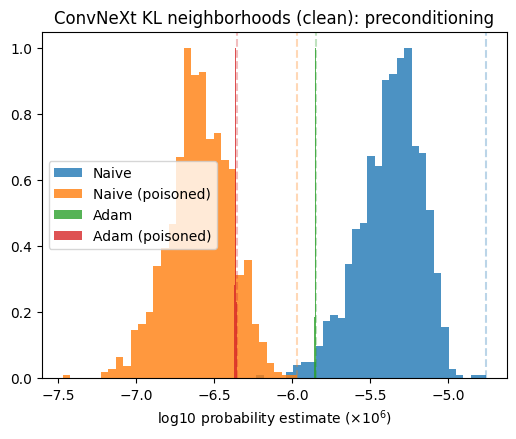

In [35]:
RESULTS = {}

for adam in [False, True]:
    for poison in [False, True]:
        filename = f"convnext_histo{'_adam' if adam else ''}{'_poison' if poison else ''}_cleansplit.pkl"
        with open(os.path.join(results_dir, filename), "rb") as f:
            result, cfg = pickle.load(f)
            print(cfg.preconditioner_type, len(result.estimates), np.mean(result.estimates), np.std(result.estimates))
            RESULTS[f"{'Adam' if adam else 'Naive'}{' (poisoned)' if poison else ''}"] = result

plt.figure(figsize=figsize)

settings = {'alpha': .8, 'fill': True}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, (label, results) in enumerate(RESULTS.items()):
    these_settings = dict(settings, label=label, color=colors[i])
    scaled_histogram(results.estimates / multiplier, label, these_settings, nbins=None if 'Naive' in label else 3)
    # Plot vertical line with matching color
    plt.axvline(aggregate(results.estimates) / multiplier, 
                color=colors[i], 
                linestyle='--',
                alpha=0.3)
plt.xlabel(f"log10 probability estimate ({mult_text})")
plt.legend()
plt.title("ConvNeXt KL neighborhoods (clean): preconditioning")
plt.savefig(os.path.join(plots_dir, "convnext_histo.svg"))
plt.savefig(os.path.join(plots_dir, "convnext_histo.pdf"))
plt.show()


## chkpts

In [23]:
[name for name in sorted(os.listdir(results_dir)) if "chkpt" in name]

['convnext_chkpts_adam_cleansplit.pkl',
 'convnext_chkpts_adam_poison_cleansplit.pkl',
 'convnext_chkpts_cleansplit.pkl',
 'convnext_chkpts_poison_cleansplit.pkl']

In [24]:
pwr = 6
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)

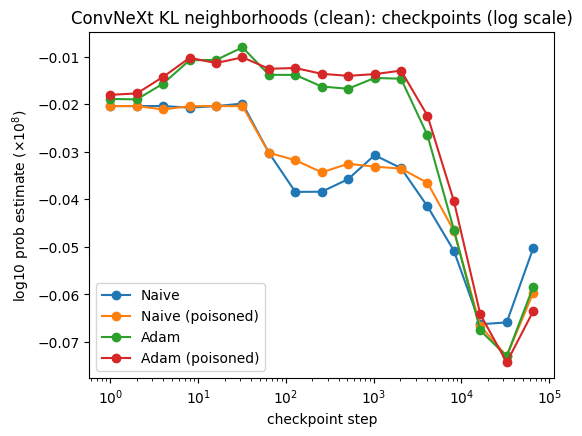

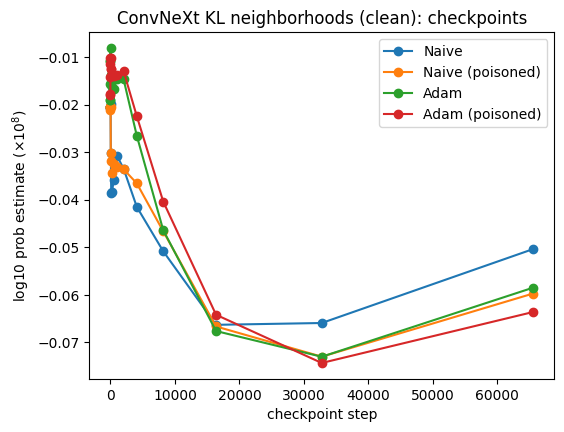

In [26]:
RESULTS = {}

for adam in [False, True]:
    for poison in [False, True]:
        filename = f"convnext_chkpts{'_adam' if adam else ''}{'_poison' if poison else ''}_cleansplit.pkl"
        with open(os.path.join(results_dir, filename), "rb") as f:
            RESULTS[f"{'Adam' if adam else 'Naive'}{' (poisoned)' if poison else ''}"], _ = pickle.load(f)


# plot maxes against checkpoint steps
plt.figure(figsize=figsize)

maxes = {}

for key, results in RESULTS.items():
    maxes[key] = [result.estimates.max() / multiplier for result in results.values()]
    plt.plot(list(results.keys()), maxes[key], 'o-', label=key)

plt.xlabel("checkpoint step")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.xscale("log")
plt.legend()
plt.title("ConvNeXt KL neighborhoods (clean): checkpoints (log scale)")
plt.savefig(os.path.join(plots_dir, "convnext_chkpts_log.svg"))
plt.savefig(os.path.join(plots_dir, "convnext_chkpts_log.pdf"))
plt.show()
# plot maxes against checkpoint steps
plt.figure(figsize=figsize)

for key, results in RESULTS.items():
    plt.plot(list(results.keys()), maxes[key], 'o-', label=key)

plt.xlabel("checkpoint step")
plt.ylabel(f"log10 prob estimate ({mult_text})")

plt.legend()
plt.title("ConvNeXt KL neighborhoods (clean): checkpoints")
plt.savefig(os.path.join(plots_dir, "convnext_chkpts.svg"))
plt.savefig(os.path.join(plots_dir, "convnext_chkpts.pdf"))
plt.show()

## cutoff

In [29]:
[name for name in sorted(os.listdir(results_dir)) if "cutoff" in name]

['convnext_cutoff_1e-05_cleansplit.pkl',
 'convnext_cutoff_1e-05_poison_cleansplit.pkl',
 'convnext_cutoff_adam_1e-05_cleansplit.pkl',
 'convnext_cutoff_adam_1e-05_poison_cleansplit.pkl']

In [29]:
convnext_model = load_convnext_checkpoint(f"{BASIN_VOLUME_DIR}/runs/b16pai_p001/checkpoint-1")
convnext_model_dim = torch.nn.utils.parameters_to_vector(convnext_model.parameters()).shape[0]
print(convnext_model_dim)

3388810


In [27]:
convnext_model_dim = 3388810

In [28]:
pwr = 6
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)

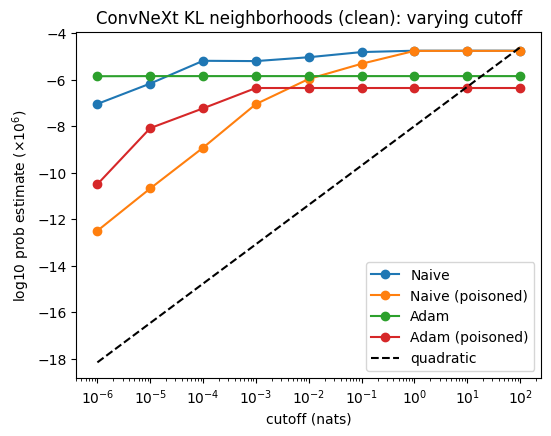

In [30]:
RESULTS = {}

for adam in [False, True]:
    for poison in [False, True]:
        filename = f"convnext_cutoff{'_adam' if adam else ''}_1e-05{'_poison' if poison else ''}_cleansplit.pkl"
        with open(os.path.join(results_dir, filename), "rb") as f:
            RESULTS[f"{'Adam' if adam else 'Naive'}{' (poisoned)' if poison else ''}"], _ = pickle.load(f)

plt.figure(figsize=figsize)

maxes = {}

for key, results in RESULTS.items():
    maxes[key] = [result.estimates.max() / multiplier for result in results.values()]
    plt.plot(list(results.keys()), maxes[key], 'o-', label=key)

# line with slope model_dim/2
plt.plot(list(RESULTS['Adam (poisoned)'].keys()), 
         [convnext_model_dim/2 * np.log(cutoff) / multiplier - 8 for cutoff in RESULTS['Adam (poisoned)'].keys()], 
         '--', color="black", 
         label="quadratic")

plt.xlabel("cutoff (nats)")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.xscale("log")
plt.legend()
plt.title("ConvNeXt KL neighborhoods (clean): varying cutoff")
plt.savefig(os.path.join(plots_dir, "convnext_cutoff.svg"))
plt.savefig(os.path.join(plots_dir, "convnext_cutoff.pdf"))
plt.show()


## exponent


In [37]:
pwr = 6
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)


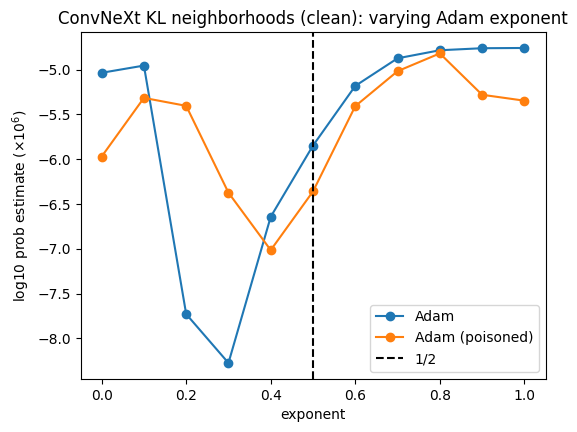

In [38]:
with open(os.path.join(results_dir, "convnext_exponent_adam_1e-05_cleansplit.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_exponent_adam_1e-05_poison_cleansplit.pkl"), "rb") as f:
    result_poison_adam, cfg = pickle.load(f)

plt.figure(figsize=figsize)

maxes_adam = [result.estimates.max() / multiplier for result in result_adam.values()]
plt.plot(list(result_adam.keys()), maxes_adam, 'o-', label="Adam")

maxes_poison_adam = [result.estimates.max() / multiplier for result in result_poison_adam.values()]
plt.plot(list(result_poison_adam.keys()), maxes_poison_adam, 'o-', label="Adam (poisoned)")

plt.axvline(0.5, 0, 10, color="black", linestyle="--", label="1/2")

plt.xlabel("exponent")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.legend()
plt.title("ConvNeXt KL neighborhoods (clean): varying Adam exponent")
plt.savefig(os.path.join(plots_dir, "convnext_exponent.svg"))
plt.savefig(os.path.join(plots_dir, "convnext_exponent.pdf"))
plt.show()